In [1]:
import statistics as st
import matplotlib.pyplot as plt
import random
import math

In [2]:
%matplotlib inline

In [3]:
def flip():
    faces = ['heads','tails']
    land = random.choice(faces)
    return land

In [4]:
flip()

'tails'

In [5]:
def simulation(n=16):
    h_count = 0
    t_count = 0
    f_loop = (2**n)
    
    while (f_loop > 0):
        f_loop -= 1
        if flip() == 'heads':
            h_count += 1
        else:
            t_count += 1
            
    if t_count==0:
        ratio = 0
    else:
        ratio = h_count/t_count
    return h_count, t_count, abs(h_count - t_count), ratio, 

In [6]:
print(simulation(16))

(32882, 32654, 228, 1.0069822992588964)


In [7]:
def plotter(n):
    chart = {}
    
    counter = n
    while (n > 0):
        chart[n] = simulation(n)
        
        n -= 1
        
    return chart

In [8]:
print(plotter(16))

{1: (1, 1, 0, 1.0), 2: (1, 3, 2, 0.3333333333333333), 3: (4, 4, 0, 1.0), 4: (9, 7, 2, 1.2857142857142858), 5: (13, 19, 6, 0.6842105263157895), 6: (36, 28, 8, 1.2857142857142858), 7: (78, 50, 28, 1.56), 8: (127, 129, 2, 0.9844961240310077), 9: (266, 246, 20, 1.08130081300813), 10: (516, 508, 8, 1.015748031496063), 11: (1037, 1011, 26, 1.0257171117705242), 12: (2030, 2066, 36, 0.9825750242013552), 13: (4131, 4061, 70, 1.0172371337109087), 14: (8188, 8196, 8, 0.9990239141044412), 15: (16384, 16384, 0, 1.0), 16: (32764, 32772, 8, 0.9997558891736849)}


In [9]:
data = plotter(16)
datavalues = data.values()

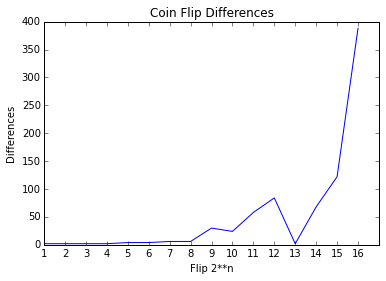

In [10]:
x1 = list(data.keys())
y1 = [item[2] for item in datavalues]
plt.plot(y1)
plt.xticks(range(len(x1)), x1)
plt.xlabel("Flip 2**n")
plt.ylabel("Differences")
plt.title("Coin Flip Differences")
plt.show()

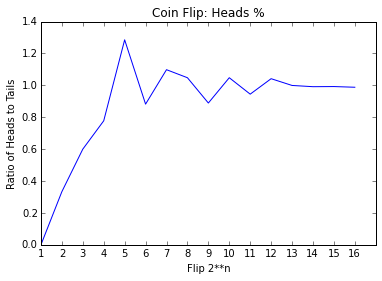

In [11]:
x1 = list(data.keys())
y1 = [item[3] for item in datavalues]
plt.plot(y1)
plt.xticks(range(len(x1)), x1)
plt.xlabel("Flip 2**n")
plt.ylabel("Ratio of Heads to Tails")
plt.title("Coin Flip: Heads %")
plt.show()

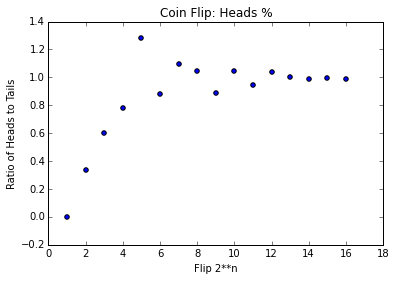

In [12]:
x1 = list(data.keys())
y1 = [item[3] for item in datavalues]
plt.scatter(x1, y1)
plt.xlabel("Flip 2**n")
plt.ylabel("Ratio of Heads to Tails")
plt.title("Coin Flip: Heads %")
plt.show()

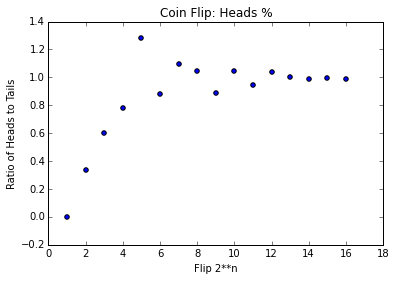

In [13]:
x1 = list(data.keys())
y1 = [item[3] for item in datavalues]
plt.scatter(x1, y1)
plt.xlabel("Flip 2**n")
plt.ylabel("Ratio of Heads to Tails")
plt.title("Coin Flip: Heads %")
plt.show()

In [14]:
a,b,c,d = simulation(16)

In [15]:
print(d)

0.9957974236379694


In [16]:
def mean_plotter(n):
    chart = {}
    
    counter = n
    while (n > 0):
        chart[n] = simulation(n)
        
        n -= 1
        
    return st.mean([item[3] for item in chart.values()])

In [17]:
def std_plotter(n):
    chart = {}
    
    counter = n
    while (n > 0):
        chart[n] = simulation(n)
        
        n -= 1
        
    return st.stdev([item[3] for item in chart.values()])

In [18]:
print(mean_plotter(16))

0.8788615344864664


In [19]:
def ratio_trials(ts, n):
    means = []
    
    counter = 1
    while (counter < ts+1):
        
        if len(means) == 1:
            means.append(mean_plotter(n))
        else:
            means.append((mean_plotter(n) + sum(means))/counter)
        
        counter += 1
        
        
    return dict(enumerate(means, start=1))

In [20]:
print(ratio_trials(20, 16))

{1: 1.0816454272944214, 2: 0.8919431567059828, 3: 0.970005727758314, 4: 1.026785239453536, 5: 0.9950921926765937, 6: 1.0052185313689663, 7: 0.9933624694004305, 8: 0.9849584262818601, 9: 0.9849320224527379, 10: 0.9905898827480331, 11: 0.9985545243889501, 12: 0.9958567649939424, 13: 1.0091432970910905, 14: 0.999407769549581, 15: 0.9881432713504325, 16: 0.9874798301196177, 17: 0.9843815334185395, 18: 0.9927603038372901, 19: 1.0004238515900805, 20: 1.0144843133800978}


In [21]:
stat_dict = ratio_trials(20, 16)


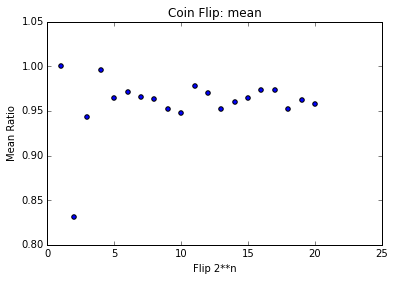

In [22]:
x1 = list(stat_dict.keys())
y1 = [item for item in stat_dict.values()]
plt.scatter(x1, y1)
plt.xlabel("Flip 2**n")
plt.ylabel("Mean Ratio")
plt.title("Coin Flip: mean")
plt.show()

In [23]:
def std_trials(ts, n):
    std = []
    
    counter = 1
    while (counter < ts+1):
        
        if len(std) == 1:
            std.append(std_plotter(n))
        else:
            std.append((std_plotter(n) + sum(std))/counter)
        
        counter += 1
        
        
    return dict(enumerate(std, start=1))

In [24]:
std_dict = std_trials(20, 16)

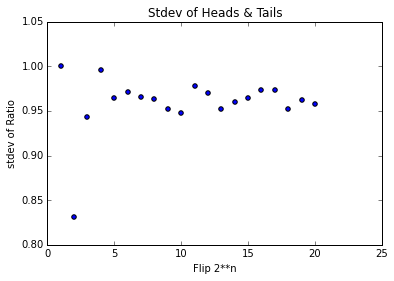

In [25]:
x1 = list(std_dict.keys())
y1 = [item for item in stat_dict.values()]
plt.scatter(x1, y1)
plt.xlabel("Flip 2**n")
plt.ylabel("stdev of Ratio")
plt.title("Stdev of Heads & Tails")
plt.show()

In [26]:
def ratio_plotter(n):
    chart = {}
    
    counter = n
    while (n > 0):
        chart[n] = simulation(n)
        
        n -= 1
        
    return [item[3] for item in chart.values()]

In [27]:
print(ratio_plotter(5))

[1.0, 1.0, 1.0, 0.45454545454545453, 2.2]


In [28]:
def heads_plotter(n):
    chart = {}
    
    counter = n
    while (n > 0):
        chart[n] = simulation(n)
        
        n -= 1
        
    return sum(([item[0] for item in chart.values()])),\
sum(([item[1] for item in chart.values()])) + sum(([item[0] for item in chart.values()]))

In [29]:
print(heads_plotter(16))

(65492, 131070)


In [30]:
def heads_trials(ts, n):
    std = []
    
    counter = 1
        
    while (counter < ts+1):
        std.append(heads_plotter(n)[0]/heads_plotter(n)[1])

        counter += 1
        
        
    return std

In [ ]:
heads_num = heads_trials(100000,100)

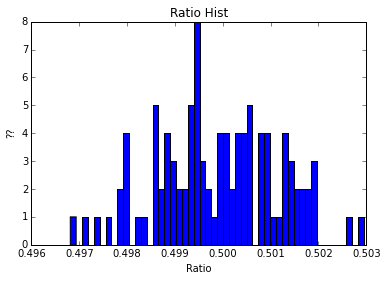

In [36]:
y1 = [heads_num]
plt.hist(y1, bins=50)
plt.xlabel("Ratio")
plt.ylabel("??")
plt.title("Ratio Hist")
plt.show()